

**Importaciones de Bibliotecas**


In [1015]:
import pandas as pd
import matplotlib as mt
import matplotlib.pyplot as plt
import numpy as np
import sklearn as skl
from datetime import datetime



**Conseguir los Datos**

In [1016]:
#Lectura del csv
url = "https://raw.githubusercontent.com/jmcastagnetto/covid-19-peru-data/master/datos/covid-19-peru-data.csv"
data=pd.read_csv(url)
data.head()


,country,iso3c,region,date,confirmed,deaths,recovered,total_pcr,total_serological,total_ag,total_tests,negative_tests,pcr_test_positive,serological_test_positive,ag_test_positive,pcr_serological_test_positive
0,Peru,PER,NaN,2020-03-06,1.0,NaN,NaN,NaN,NaN,NaN,NaN,154.0,NaN,NaN,NaN,NaN
1,Peru,PER,NaN,2020-03-07,6.0,NaN,NaN,NaN,NaN,NaN,NaN,213.0,NaN,NaN,NaN,NaN
2,Peru,PER,NaN,2020-03-09,9.0,NaN,NaN,NaN,NaN,NaN,NaN,309.0,NaN,NaN,NaN,NaN
3,Peru,PER,NaN,2020-03-10,11.0,NaN,NaN,NaN,NaN,NaN,NaN,335.0,NaN,NaN,NaN,NaN
4,Peru,PER,NaN,2020-03-11,17.0,NaN,NaN,NaN,NaN,NaN,NaN,697.0,NaN,NaN,NaN,NaN


**Histogramas de los Datos**

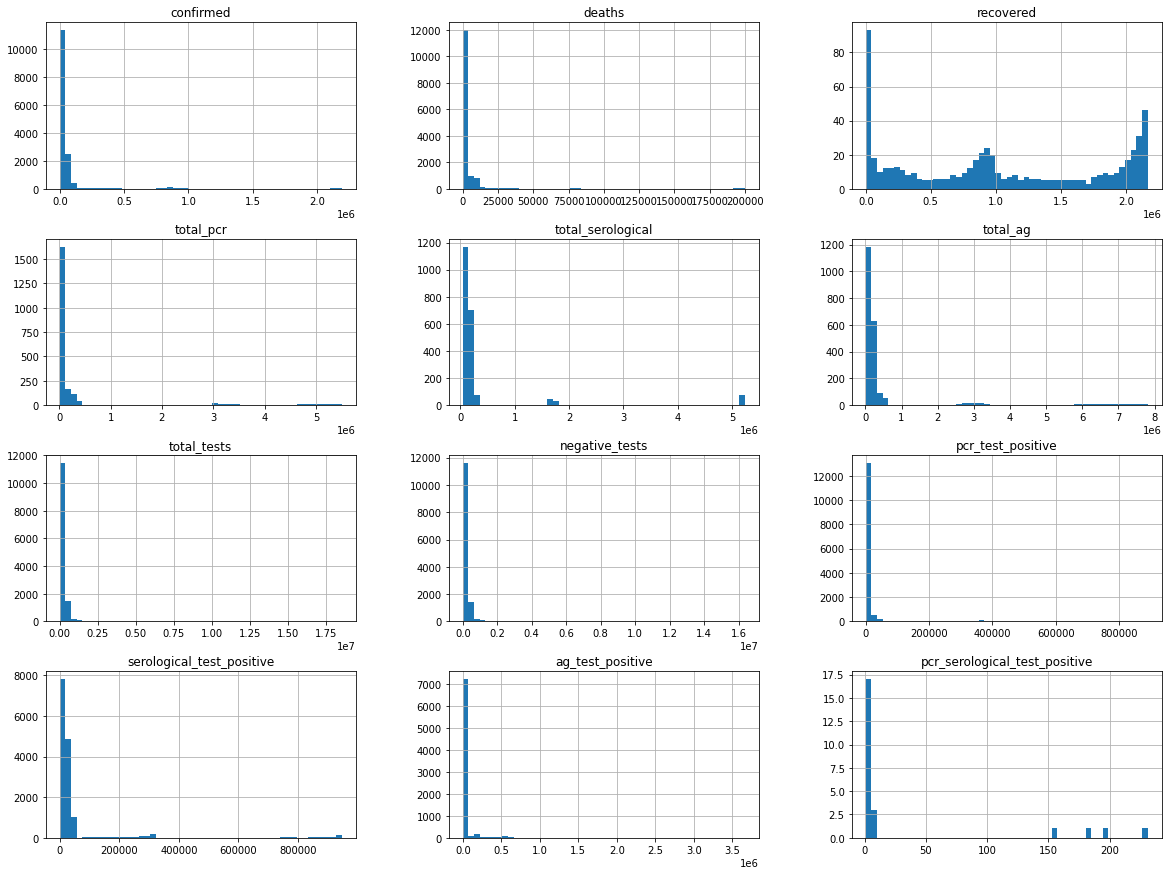

In [1017]:
data.hist(bins=50,figsize=(20,15))
plt.show()

**Preparar los Datos para Procesar**

In [1018]:
#Cambiar los datos NaN por 0 donde sea conveniente
def elimNAN(df):
  for column in df:
    df[column] = df[column].fillna(0)

elimNAN(data)

In [1019]:
#selección de datos
#Para Peru
peru=data.loc[data['region'] == 0]
peru

,country,iso3c,region,date,confirmed,deaths,recovered,total_pcr,total_serological,total_ag,total_tests,negative_tests,pcr_test_positive,serological_test_positive,ag_test_positive,pcr_serological_test_positive
0,Peru,PER,0,2020-03-06,1.0,0.0,0.0,0.0,0.0,0.0,0.0,154.0,0.0,0.0,0.0,0.0
1,Peru,PER,0,2020-03-07,6.0,0.0,0.0,0.0,0.0,0.0,0.0,213.0,0.0,0.0,0.0,0.0
2,Peru,PER,0,2020-03-09,9.0,0.0,0.0,0.0,0.0,0.0,0.0,309.0,0.0,0.0,0.0,0.0
3,Peru,PER,0,2020-03-10,11.0,0.0,0.0,0.0,0.0,0.0,0.0,335.0,0.0,0.0,0.0,0.0
4,Peru,PER,0,2020-03-11,17.0,0.0,0.0,0.0,0.0,0.0,0.0,697.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15304,Peru,PER,0,2021-10-13,2186246.0,199746.0,2163578.0,5446721.0,5226747.0,7693849.0,18367317.0,16181071.0,649104.0,946098.0,591044.0,0.0
15331,Peru,PER,0,2021-10-14,2187368.0,199746.0,2164746.0,5459835.0,5227748.0,7724494.0,18412077.0,16224709.0,649483.0,946145.0,591740.0,0.0
15358,Peru,PER,0,2021-10-15,2188351.0,199792.0,2165822.0,5475857.0,5229147.0,7753011.0,18458015.0,16269664.0,649841.0,946199.0,592311.0,0.0
15385,Peru,PER,0,2021-10-16,2189165.0,199816.0,2166743.0,5489238.0,5230561.0,7781380.0,18501179.0,16312014.0,650060.0,946258.0,592847.0,0.0


In [1020]:
#Para Arequipa
arequipa=data.loc[data['region'] == 'Arequipa']
arequipa

,country,iso3c,region,date,confirmed,deaths,recovered,total_pcr,total_serological,total_ag,total_tests,negative_tests,pcr_test_positive,serological_test_positive,ag_test_positive,pcr_serological_test_positive
6,Peru,PER,Arequipa,2020-03-13,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12,Peru,PER,Arequipa,2020-03-14,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19,Peru,PER,Arequipa,2020-03-15,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
30,Peru,PER,Arequipa,2020-03-16,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
41,Peru,PER,Arequipa,2020-03-17,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15281,Peru,PER,Arequipa,2021-10-13,114992.0,9667.0,0.0,390189.0,307912.0,576903.0,1275004.0,1160012.0,26466.0,49519.0,39007.0,0.0
15308,Peru,PER,Arequipa,2021-10-14,115036.0,9667.0,0.0,391734.0,307941.0,579520.0,1279195.0,1164159.0,26488.0,49522.0,39026.0,0.0
15335,Peru,PER,Arequipa,2021-10-15,115074.0,9666.0,0.0,393895.0,307980.0,581767.0,1283642.0,1168568.0,26500.0,49528.0,39046.0,0.0
15362,Peru,PER,Arequipa,2021-10-16,115100.0,9669.0,0.0,394611.0,308013.0,584284.0,1286908.0,1171808.0,26513.0,49529.0,39058.0,0.0


In [1021]:
# #Cambiar los datos NaN por 0 donde sea conveniente

#Se toman en cuenta para los Xs, las fechas, recuperados y el total de pruebas realizadas para un entrenamiento
#Y se toman los resultados de las pruebas para los Xs de otro entrenamiento

# #Separación de datos de entrenamiento Peru
per_training_Xdf=peru.loc[:,['date']].copy()

per_training_Xdf1=peru.loc[:,['date','total_tests','total_pcr','total_serological','total_ag',	'total_tests', 'negative_tests',
'pcr_test_positive','serological_test_positive', 'ag_test_positive']].copy()

perc_training_Ydf=peru.loc[:,['confirmed']].copy()
perd_training_Ydf=peru.loc[:,['deaths']].copy()

perc_training_Y=peru['confirmed'].values
perd_training_Y=peru['deaths'].values

#Separación de datos de entrenamiento Arequipa
aqp_training_Xdf=arequipa.loc[:,['date']].copy()

aqp_training_Xdf1=arequipa.loc[:,['date','total_tests','total_pcr','total_serological','total_ag',	'total_tests', 'negative_tests',
'pcr_test_positive','serological_test_positive', 'ag_test_positive']].copy()

aqpc_training_Ydf=arequipa.loc[:,['confirmed']].copy()
aqpd_training_Ydf=arequipa.loc[:,['deaths']].copy()

aqpc_training_Y=arequipa['confirmed'].values
aqpd_training_Y=arequipa['deaths'].values

In [1022]:
#Seleccion de datos numericos y cambiar datos a int

#Para Peru
per_training_Xdf['date'] = pd.to_datetime(per_training_Xdf['date']).astype('int')

per_training_Xdf1['date'] = pd.to_datetime(per_training_Xdf1['date']).astype('int')
per_training_Xdf1= per_training_Xdf1.astype({"total_tests":'int',"total_pcr":'int',
               "total_serological":'int',	"total_ag":'int',	"total_tests":'int', "negative_tests":'int',
               "pcr_test_positive":'int',	"serological_test_positive":'int', "ag_test_positive":'int'})

#Para Arequipa
aqp_training_Xdf['date'] = pd.to_datetime(aqp_training_Xdf['date']).astype('int')

aqp_training_Xdf1['date'] = pd.to_datetime(aqp_training_Xdf1['date']).astype('int')
aqp_training_Xdf1= aqp_training_Xdf1.astype({"total_tests":'int',"total_pcr":'int',
               "total_serological":'int',	"total_ag":'int',	"total_tests":'int', "negative_tests":'int',
               "pcr_test_positive":'int',	"serological_test_positive":'int', "ag_test_positive":'int'})

#Eliminacion de ruido
def elim_ruido(X):
    filas, columnas = X.shape
    for i in range(1, filas):
        for j in range(0, columnas):
            if X[i][j]  == 0:
                X[i][j] = X[i - 1][j]
    return X

def elim_ruido_series(X):
    filas= X.shape[0]
    for i in range (1, filas):
            if X[i] == 0:
                X[i]= X[i - 1]
    return X

#Normalización

def normalizacion_X(X):
  mu=np.mean(X,axis=0)
  sigma=np.std(X,axis=0,ddof=1)
  X_norm=(X-mu)/sigma
  return X_norm,mu,sigma

#Normalización, y limpieza de ruido de los datos de Perú

per_training_Xdf,permu,persigma=normalizacion_X(per_training_Xdf)
per_training_Xdf1,permu1,persigma1=normalizacion_X(per_training_Xdf1)

per_training_X=per_training_Xdf.values
per_training_X1=per_training_Xdf1.values

per_training_X=elim_ruido(per_training_X)
per_training_X1=elim_ruido(per_training_X1)

perc_training_Y=elim_ruido_series(perc_training_Y)
perd_training_Y=elim_ruido_series(perd_training_Y)

#Normalización, y limpieza de ruido de los datos de Arequipa

aqp_training_Xdf,aqpmu,aqpsigma=normalizacion_X(aqp_training_Xdf)
aqp_training_Xdf1,aqpmu1,aqpsigma1=normalizacion_X(aqp_training_Xdf1)

aqp_training_X=aqp_training_Xdf.values
aqp_training_X1=aqp_training_Xdf1.values

aqp_training_X=elim_ruido(aqp_training_X)
aqp_training_X1=elim_ruido(aqp_training_X1)

aqpc_training_Y=elim_ruido_series(aqpc_training_Y)
aqpd_training_Y=elim_ruido_series(aqpd_training_Y)


#Separación para entrenamiento y testing
#La predicción debe ser realizada en un rango del 18 agosto al 11 de octubre 2021)

perc_testing_Y=perc_training_Y[523:][:]
perd_testing_Y=perd_training_Y[523:][:]

perc_training_Y=perc_training_Y[:522][:]
perd_training_Y=perd_training_Y[:522][:]

per_testing_X=per_training_X[523:][:]
per_training_X=per_training_X[:522][:]

per_testing_X1=per_training_X1[523:][:]
per_training_X1=per_training_X1[:522][:]


aqpc_testing_Y=aqpc_training_Y[517:][:]
aqpd_testing_Y=aqpd_training_Y[517:][:]

aqpc_training_Y=aqpc_training_Y[:516][:]
aqpd_training_Y=aqpd_training_Y[:516][:]

aqp_testing_X=aqp_training_X[517:][:]
aqp_training_X=aqp_training_X[:516][:]

aqp_testing_X1=aqp_training_X1[517:][:]
aqp_training_X1=aqp_training_X1[:516][:]

#Valores que definen la cantidad de filas de entrenamiento y testing: 522 y 516


perTrainingSize=len(perc_training_Y)

aqpTrainingSize=len(aqpc_training_Y)

perTestingSize=len(perc_testing_Y)

aqpTestingSize=len(aqpc_testing_Y)

#Función Extra

def obtenerfechas(X,sigma,mu):
  date=((X[:,0]*sigma[0])+mu[0])/1e9
  date1=[]
  for j in range(0,len(date)):
    date1.append(datetime.utcfromtimestamp(date[j]).strftime('%Y-%m-%d'))
    j=j+1
  return date1


In [1023]:
print('permu=\n', permu,'\n')
print('persigma=\n', persigma,'\n')
print('per_training_Xdf=\n', per_training_Xdf[:5],'\n')

print('aqpmu=\n', aqpmu,'\n')
print('aqpsigma=\n', aqpsigma,'\n')
print('aqp_training_Xdf=\n', aqp_training_Xdf[:5],'\n')

permu=
 date    1.608984e+18
dtype: float64 

persigma=
 date    1.472848e+16
dtype: float64 

per_training_Xdf=
        date
0 -1.733438
1 -1.727572
2 -1.715840
3 -1.709974
4 -1.704108 

aqpmu=
 date    1.609243e+18
dtype: float64 

aqpsigma=
 date    1.457832e+16
dtype: float64 

aqp_training_Xdf=
         date
6  -1.727606
12 -1.721680
19 -1.715753
30 -1.709827
41 -1.703900 



In [1024]:
print('permu1=\n', permu1,'\n')
print('persigma1=\n', persigma1,'\n')
print('per_training_Xdf1=\n', per_training_Xdf1[:5],'\n')

print('aqpmu1=\n', aqpmu1,'\n')
print('aqpsigma1=\n', aqpsigma1,'\n')
print('aqp_training_Xdf1=\n', aqp_training_Xdf1[:5],'\n')

permu1=
 date                         1.608984e+18
total_tests                  7.231454e+06
total_pcr                    6.684634e+05
total_serological            6.858019e+05
total_ag                     9.030240e+05
total_tests                  7.231454e+06
negative_tests               6.117438e+06
pcr_test_positive            3.116458e+05
serological_test_positive    6.226681e+05
ag_test_positive             1.814960e+05
dtype: float64 

persigma1=
 date                         1.472848e+16
total_tests                  5.745960e+06
total_pcr                    1.716568e+06
total_serological            1.758582e+06
total_ag                     2.325430e+06
total_tests                  5.745960e+06
negative_tests               5.014385e+06
pcr_test_positive            2.322659e+05
serological_test_positive    3.397663e+05
ag_test_positive             2.732710e+05
dtype: float64 

per_training_Xdf1=
        date  total_tests  ...  serological_test_positive  ag_test_positive
0 -1.73343

In [1025]:
#Agregando la columna de 1s de características

aqp_training_X=np.hstack((np.ones((aqpTrainingSize,1)),aqp_training_X))
aqp_training_X1=np.hstack((np.ones((aqpTrainingSize,1)),aqp_training_X1))

per_training_X=np.hstack((np.ones((perTrainingSize,1)),per_training_X))
per_training_X1=np.hstack((np.ones((perTrainingSize,1)),per_training_X1))

per_testing_X=np.hstack((np.ones((perTestingSize,1)),per_testing_X))
aqp_testing_X=np.hstack((np.ones((aqpTestingSize,1)),aqp_testing_X))

per_testing_X1=np.hstack((np.ones((perTestingSize,1)),per_testing_X1))
aqp_testing_X1=np.hstack((np.ones((aqpTestingSize,1)),aqp_testing_X1))

In [1026]:
#Funcion costo
def costo(X,y,theta):
  predicciones=X.dot(theta)
  errores=np.subtract(predicciones,y)
  sqrError=np.square(errores)
  J=1/(2*len(y))*errores.T.dot(errores)
  return J

#Gradiente descendiente para regresión linear

def graddes(X,y,theta, lr,iteraciones):
  historialcost=np.zeros(iteraciones)
  for i in range(iteraciones):
    y_pred=X[:,0]*theta[0]+np.power(X[:,1],2)*theta[1]
    D_m=(-2/len(y))*np.sum(X.T*(y-y_pred))
    D_c=(-2/len(y))*np.sum(X.T*y_pred)
    theta[0]=theta[0]-lr*D_m
    theta[1]=theta[1]-lr*D_c
    historialcost[i]=costo(X,y,theta)
  return theta, historialcost

#Gradiente descendente para regresión multivariada
def graddes1(X,y,theta, lr,iteraciones):
  historialcost=np.zeros(iteraciones)
  for i in range(iteraciones):
    predicciones=X.dot(theta)
    errores=predicciones-y
    sum_delta= (lr/len(y))* X.T.dot(errores);
    theta=theta-sum_delta;
    historialcost[i]=costo(X,y,theta)
  return theta, historialcost



aqpctheta=np.zeros(len(aqp_training_Xdf.columns)+1)
aqpdtheta=np.zeros(len(aqp_training_Xdf.columns)+1)
aqpctheta1=np.zeros(len(aqp_training_Xdf1.columns)+1)
aqpdtheta1=np.zeros(len(aqp_training_Xdf1.columns)+1)

perctheta=np.zeros(len(per_training_Xdf.columns)+1)
perdtheta=np.zeros(len(per_training_Xdf.columns)+1)
perctheta1=np.zeros(len(per_training_Xdf1.columns)+1)
perdtheta1=np.zeros(len(per_training_Xdf1.columns)+1)

percepochs=6250
percL=0.0001

perdepochs=7000
perdL=0.0001

aqpcepochs=6250
aqpcL=0.0001

aqpdepochs=7188
aqpdL=0.0001

percepochs1=15000#175000
percL1=0.001 

perdepochs1=15000#120000
perdL1=0.001

aqpcepochs1=15000#200000
aqpcL1=0.001

aqpdepochs1=15000 #125000
aqpdL1=0.001

aqpctheta, aqpc_historialcost=graddes(aqp_training_X,aqpc_training_Y,aqpctheta,aqpcL,aqpcepochs)
aqpdtheta, aqpd_historialcost=graddes(aqp_training_X,aqpd_training_Y,aqpdtheta,aqpdL,aqpdepochs)
perctheta, perc_historialcost=graddes(per_training_X,perc_training_Y,perctheta,percL,percepochs)
perdtheta, perd_historialcost=graddes(per_training_X,perd_training_Y,perdtheta,perdL,perdepochs)

aqpctheta1, aqpc_historialcost1=graddes1(aqp_training_X1,aqpc_training_Y,aqpctheta1,aqpcL1,aqpcepochs1)
aqpdtheta1, aqpd_historialcost1=graddes1(aqp_training_X1,aqpd_training_Y,aqpdtheta1,aqpdL1,aqpdepochs1)
perctheta1, perc_historialcost1=graddes1(per_training_X1,perc_training_Y,perctheta1,percL1,percepochs1)
perdtheta1, perd_historialcost1=graddes1(per_training_X1,perd_training_Y,perdtheta1,perdL1,perdepochs1)



In [1027]:
print('aqpctheta= ', aqpctheta)
print('aqpccost= ',aqpc_historialcost[-5:])
print('aqpdtheta= ', aqpdtheta)
print('aqpdcost= ',aqpd_historialcost[-5:])
print('perctheta= ', perctheta)
print('perccost= ',perc_historialcost[-5:])
print('perdtheta= ', perdtheta)
print('perdcost= ',perd_historialcost[-5:])

aqpctheta=  [47231.64098802 33645.56619854]
aqpccost=  [33905291.97042842 33877149.49623187 33849087.79863866 33821106.8993346
 33793206.82001197]
aqpdtheta=  [2886.34456991 2521.38623439]
aqpdcost=  [1369415.45663383 1369428.36717799 1369441.58351936 1369455.10575222
 1369468.93397089]
perctheta=  [1011439.50489244  725049.43136569]
perccost=  [1.09847142e+10 1.09741158e+10 1.09635556e+10 1.09530336e+10
 1.09425498e+10]
perdtheta=  [63641.34914487 53807.17405935]
perdcost=  [5.86082806e+08 5.86077360e+08 5.86072062e+08 5.86066913e+08
 5.86061913e+08]


In [1028]:
print('aqpctheta1= ', aqpctheta1)
print('aqpccost1= ',aqpc_historialcost1[-5:])
print('aqpdtheta1= ', aqpdtheta1)
print('aqpdcost1= ',aqpd_historialcost1[-5:])
print('perctheta1= ', perctheta1)
print('perccost1= ',perc_historialcost1[-5:])
print('perdtheta1= ', perdtheta1)
print('perdcost1= ',perd_historialcost1[-5:])

aqpctheta1=  [53347.88050039  9770.69511592  3198.55597709  -719.59460343
  1758.59610076 -1546.26298863  3198.55597709  2583.66221131
  4555.50494502 10278.33478566  6921.19730455]
aqpccost1=  [8539451.08170561 8539305.42796605 8539159.79172071 8539014.17296221
 8538868.57168319]
aqpdtheta1=  [3186.01149734  -49.73005333  411.28280663  -33.75748707  115.72744174
  -83.7835737   411.28280663  359.26363133  264.24589516  -27.79444521
 2177.10435888]
aqpdcost1=  [288953.58446964 288948.85151455 288944.11878108 288939.38626921
 288934.65397891]
perctheta1=  [1121701.24802619  212729.70699643  111625.16196737  -18018.24234132
   12015.67656198  -44518.95527159  111625.16196737  101720.822948
  144735.11639037  111694.88151753    7001.55004777]
perccost1=  [2.84766894e+09 2.84762969e+09 2.84759045e+09 2.84755122e+09
 2.84751199e+09]
perdtheta1=  [ 70951.37909045   4069.12606357  23788.22689003   2870.44083179
   5068.02903324    923.57060074  23788.22689003  26349.14189901
   -783.97172993 

Text(0.5, 1.0, 'Convergencia del gradiente descendiente en Casos Confirmados en Perú')

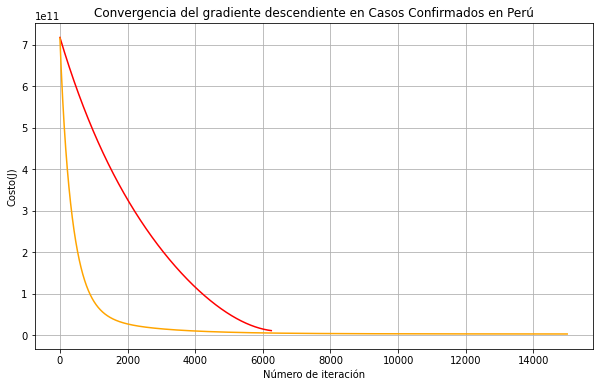

In [1029]:
#Graficando convergencia del gradiente descendiente en Casos Confirmados en Perú

plt.plot(range(1, percepochs+1), perc_historialcost, color='red')
plt.plot(range(1, percepochs1+1), perc_historialcost1, color='orange')
plt.rcParams["figure.figsize"]=(10,6)
plt.grid()
plt.xlabel("Número de iteración")
plt.ylabel("Costo(J)")
plt.title("Convergencia del gradiente descendiente en Casos Confirmados en Perú")

Text(0.5, 1.0, 'Convergencia del gradiente descendiente en Muertes en Perú')

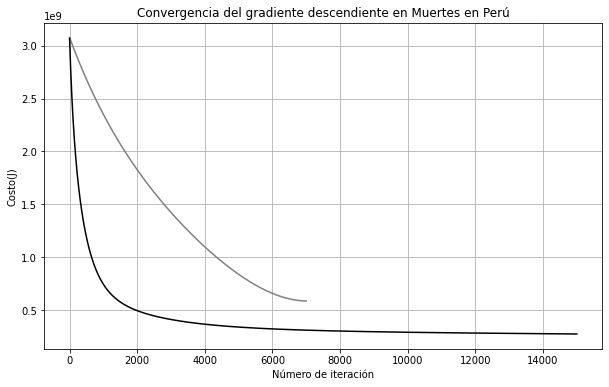

In [1030]:
#Graficando convergencia del gradiente descendiente en Muertes en Perú

plt.plot(range(1, perdepochs+1), perd_historialcost, color='grey')
plt.plot(range(1, perdepochs1+1), perd_historialcost1, color='black')
plt.rcParams["figure.figsize"]=(10,6)
plt.grid()
plt.xlabel("Número de iteración")
plt.ylabel("Costo(J)")
plt.title("Convergencia del gradiente descendiente en Muertes en Perú")

Text(0.5, 1.0, 'Convergencia del gradiente descendiente en Casos Confirmados en Arequipa')

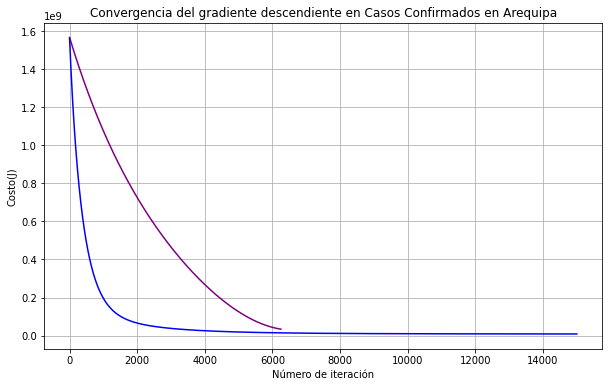

In [1031]:
#Graficando convergencia del gradiente descendiente en Casos Confirmados en Arequipa
plt.plot(range(1, aqpcepochs+1), aqpc_historialcost, color='purple')
plt.plot(range(1, aqpcepochs1+1), aqpc_historialcost1, color='blue')
plt.rcParams["figure.figsize"]=(10,6)
plt.grid()
plt.xlabel("Número de iteración")
plt.ylabel("Costo(J)")
plt.title("Convergencia del gradiente descendiente en Casos Confirmados en Arequipa")

Text(0.5, 1.0, 'Convergencia del gradiente descendiente en Muertes en Arequipa')

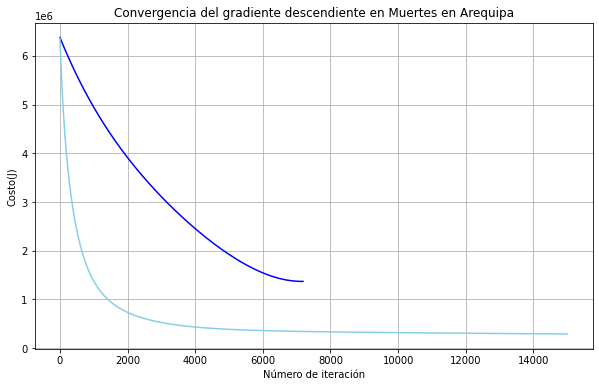

In [1032]:
#Graficando convergencia del gradiente descendiente en Muertes en Arequipa
plt.plot(range(1, aqpdepochs+1), aqpd_historialcost, color='blue')
plt.plot(range(1, aqpdepochs1+1), aqpd_historialcost1, color='skyblue')
plt.rcParams["figure.figsize"]=(10,6)
plt.grid()
plt.xlabel("Número de iteración")
plt.ylabel("Costo(J)")
plt.title("Convergencia del gradiente descendiente en Muertes en Arequipa")

In [1033]:
#Se toma solamente en cuenta el primer valor añadido y la fecha
def funcion_pred(X, theta, lineal=True):
  if(lineal==True):
    return theta[0] * X[:,0] + theta[1] * np.power(X[:,1], 2)
  else:
    return np.dot(theta,X.T)


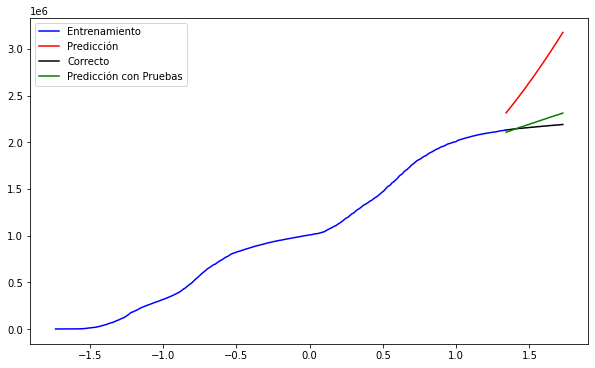

In [1034]:
#Prediccion de casos confirmados en Peru
perc_pred_y=funcion_pred(per_testing_X,perctheta,True)
plt.plot(per_training_X[:,1], perc_training_Y, color = "blue", label = "Entrenamiento")
plt.plot(per_testing_X[:,1], perc_pred_y, color = "red", label = "Predicción")
plt.plot(aqp_testing_X[:,1], perc_testing_Y, color = "black", label = "Correcto")


perc_pred_y1=funcion_pred(per_testing_X1,perctheta1,False)
plt.plot(per_testing_X[:,1], perc_pred_y1, color = "green", label = "Predicción con Pruebas")

plt.legend(loc = "upper left")
plt.show()

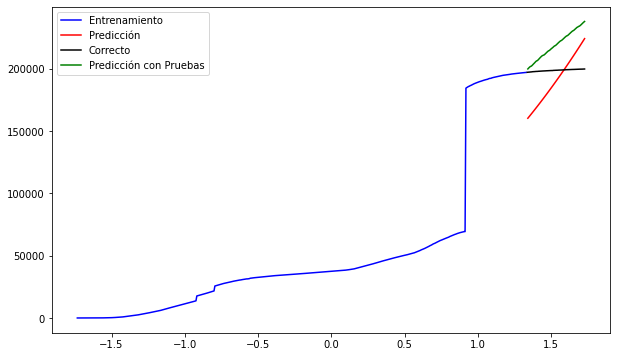

In [1035]:
#Prediccion de muertes en Peru
perd_pred_y=funcion_pred(per_testing_X,perdtheta,True)
plt.plot(per_training_X[:,1], perd_training_Y, color = "blue", label = "Entrenamiento")
plt.plot(per_testing_X[:,1], perd_pred_y, color = "red", label = "Predicción")
plt.plot(aqp_testing_X[:,1], perd_testing_Y, color = "black", label = "Correcto")


perd_pred_y1=funcion_pred(per_testing_X1,perdtheta1,False)
plt.plot(per_testing_X[:,1], perd_pred_y1, color = "green", label = "Predicción con Pruebas")
plt.legend(loc = "upper left")
plt.show()

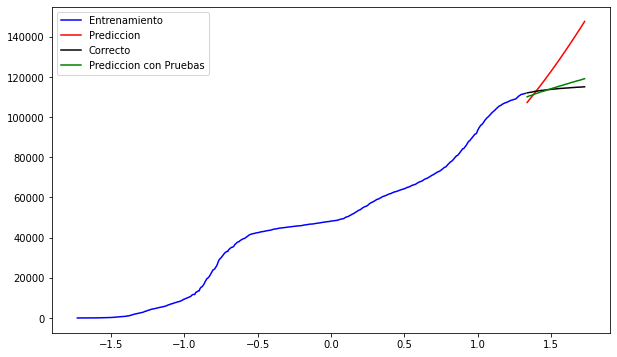

In [1036]:
#Prediccion de casos confirmados en Arequipa
aqpc_pred_y=funcion_pred(aqp_testing_X,aqpctheta,True)

plt.plot(aqp_training_X[:,1], aqpc_training_Y, color = "blue", label = "Entrenamiento")
plt.plot(aqp_testing_X[:,1], aqpc_pred_y, color = "red", label = "Prediccion")
plt.plot(aqp_testing_X[:,1], aqpc_testing_Y, color = "black", label = "Correcto")


aqpc_pred_y1=funcion_pred(aqp_testing_X1,aqpctheta1,False)
plt.plot(aqp_testing_X[:,1], aqpc_pred_y1, color = "green", label = "Prediccion con Pruebas")

plt.legend(loc = "upper left")
plt.show()

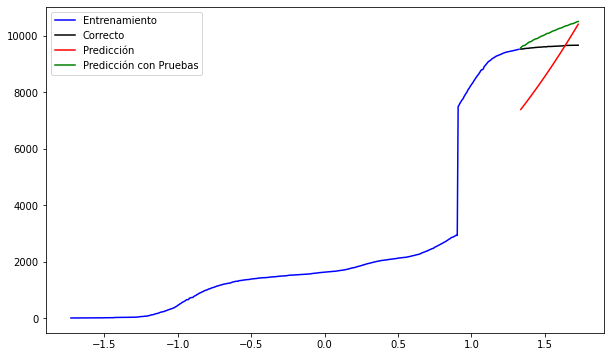

In [1037]:
#Prediccion de muertes en Arequipa
aqpd_pred_y=funcion_pred(aqp_testing_X,aqpdtheta,True)

plt.plot(aqp_training_X[:,1], aqpd_training_Y, color = "blue", label = "Entrenamiento")
plt.plot(aqp_testing_X[:,1], aqpd_testing_Y, color = "black", label = "Correcto")

plt.plot(aqp_testing_X[:,1], aqpd_pred_y, color = "red", label = "Predicción")

aqpd_pred_y1=funcion_pred(aqp_testing_X1,aqpdtheta1,False)
plt.plot(aqp_testing_X[:,1], aqpd_pred_y1, color = "green", label = "Predicción con Pruebas")


plt.legend(loc = "upper left")
plt.show()